In [128]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
columns = ["CCN", "REPORT_DAT","SHIFT", "OFFENSE", "METHOD", "VOTING_PRECINCT", "XBLOCK", "YBLOCK","PSA", "NEIGHBORHOOD_CLUSTER"]
target = ["crimetype"]

In [130]:
#Load data
file_path = Path('Crime_Incidents_in_2021 (1).csv')
dc_crime_df_2021 = pd.read_csv(file_path, skiprows=0)[:-2]

dc_crime_df_2021 = dc_crime_df_2021.loc[:, columns].copy()
dc_crime_df_2021 = dc_crime_df_2021.dropna(axis='columns', how='all')

#drop the null rows:
dc_crime_df_2021 = dc_crime_df_2021.dropna()

dc_crime_df_2021.head(10)

,CCN,REPORT_DAT,SHIFT,OFFENSE,METHOD,VOTING_PRECINCT,XBLOCK,YBLOCK,PSA,NEIGHBORHOOD_CLUSTER
0,20139232,2021/12/06 05:00:00+00,MIDNIGHT,HOMICIDE,GUN,Precinct 46,398576.16,141939.53,407.0,Cluster 18
1,11048862,2021/10/13 21:24:42+00,EVENING,THEFT F/AUTO,OTHERS,Precinct 27,394049.03,140468.17,204.0,Cluster 15
2,10008883,2021/08/04 20:36:50+00,EVENING,THEFT/OTHER,OTHERS,Precinct 105,406401.56,135172.74,604.0,Cluster 33
3,11124202,2021/09/01 12:39:59+00,DAY,THEFT/OTHER,OTHERS,Precinct 77,400924.55,137563.02,506.0,Cluster 23
4,12113231,2021/08/12 12:00:17+00,DAY,THEFT/OTHER,OTHERS,Precinct 76,401249.74,138295.18,506.0,Cluster 23
5,15003190,2021/10/21 04:08:27+00,MIDNIGHT,THEFT F/AUTO,OTHERS,Precinct 129,397041.70,137184.93,207.0,Cluster 8
6,21051546,2021/04/23 14:39:37+00,DAY,THEFT F/AUTO,OTHERS,Precinct 69,402674.74,140800.41,503.0,Cluster 24
7,21051553,2021/04/23 16:37:32+00,DAY,BURGLARY,OTHERS,Precinct 83,400318.94,137500.98,501.0,Cluster 25
8,21051567,2021/04/23 15:48:59+00,DAY,THEFT/OTHER,OTHERS,Precinct 144,399695.20,137774.00,501.0,Cluster 25
9,21051603,2021/04/23 16:08:48+00,DAY,THEFT/OTHER,OTHERS,Precinct 91,401147.60,134664.50,106.0,Cluster 26


In [131]:
file_path = Path('Crime_Incidents_in_2020 (1).csv')
dc_crime_df_2020 = pd.read_csv(file_path, skiprows=0)[:-2]

dc_crime_df_2020 = dc_crime_df_2020.loc[:, columns].copy()
dc_crime_df_2020 = dc_crime_df_2020.dropna(axis='columns', how='all')

#drop the null rows:
dc_crime_df_2020 = dc_crime_df_2020.dropna()

dc_crime_df_2020.head(10)

,CCN,REPORT_DAT,SHIFT,OFFENSE,METHOD,VOTING_PRECINCT,XBLOCK,YBLOCK,PSA,NEIGHBORHOOD_CLUSTER
0,19229474,2020/01/06 17:59:54+00,DAY,THEFT/OTHER,OTHERS,Precinct 141,397228.810000,138511.210000,301.0,Cluster 3
1,20000062,2020/01/01 07:37:38+00,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,Precinct 91,400734.620319,134715.449978,106.0,Cluster 26
2,20000165,2020/01/01 08:36:44+00,MIDNIGHT,THEFT/OTHER,OTHERS,Precinct 17,397001.240000,137426.670000,207.0,Cluster 8
3,20000188,2020/01/01 09:20:49+00,MIDNIGHT,THEFT F/AUTO,OTHERS,Precinct 21,397921.280000,138345.510000,307.0,Cluster 7
4,20000202,2020/01/01 09:53:33+00,MIDNIGHT,ASSAULT W/DANGEROUS WEAPON,GUN,Precinct 1,399214.790000,137753.750000,102.0,Cluster 8
5,20000205,2020/01/01 09:25:41+00,MIDNIGHT,ROBBERY,OTHERS,Precinct 69,403053.650000,140739.910000,503.0,Cluster 24
6,20000217,2020/01/01 10:34:52+00,MIDNIGHT,THEFT/OTHER,OTHERS,Precinct 14,396217.890000,138008.230000,208.0,Cluster 6
7,20000218,2020/01/01 10:26:32+00,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,Precinct 144,399272.370000,136594.950000,102.0,Cluster 25
8,20000232,2020/01/01 11:07:24+00,MIDNIGHT,ASSAULT W/DANGEROUS WEAPON,GUN,Precinct 79,402339.050000,137267.000000,507.0,Cluster 23
9,20000249,2020/01/01 10:56:19+00,MIDNIGHT,THEFT/OTHER,OTHERS,Precinct 137,397921.520000,138712.810000,305.0,Cluster 3


In [132]:
frames = [dc_crime_df_2021, dc_crime_df_2020]

dc_crime_df = pd.concat(frames)
display(dc_crime_df)

,CCN,REPORT_DAT,SHIFT,OFFENSE,METHOD,VOTING_PRECINCT,XBLOCK,YBLOCK,PSA,NEIGHBORHOOD_CLUSTER
0,20139232,2021/12/06 05:00:00+00,MIDNIGHT,HOMICIDE,GUN,Precinct 46,398576.160000,141939.530000,407.0,Cluster 18
1,11048862,2021/10/13 21:24:42+00,EVENING,THEFT F/AUTO,OTHERS,Precinct 27,394049.030000,140468.170000,204.0,Cluster 15
2,10008883,2021/08/04 20:36:50+00,EVENING,THEFT/OTHER,OTHERS,Precinct 105,406401.560000,135172.740000,604.0,Cluster 33
3,11124202,2021/09/01 12:39:59+00,DAY,THEFT/OTHER,OTHERS,Precinct 77,400924.550000,137563.020000,506.0,Cluster 23
4,12113231,2021/08/12 12:00:17+00,DAY,THEFT/OTHER,OTHERS,Precinct 76,401249.740000,138295.180000,506.0,Cluster 23
...,...,...,...,...,...,...,...,...,...,...
27905,20026522,2020/02/13 04:55:40+00,MIDNIGHT,THEFT F/AUTO,OTHERS,Precinct 67,400346.610000,142041.770000,405.0,Cluster 20
27906,20029077,2020/02/17 17:26:55+00,DAY,THEFT/OTHER,OTHERS,Precinct 113,403198.671489,132699.499289,606.0,Cluster 35
27907,20029087,2020/02/17 18:03:27+00,DAY,THEFT F/AUTO,OTHERS,Precinct 114,400867.100000,132951.290000,701.0,Cluster 28
27908,20029090,2020/02/17 18:15:15+00,DAY,THEFT F/AUTO,OTHERS,Precinct 35,396163.700000,139534.460000,303.0,Cluster 1


In [133]:
dc_crime_df['REPORT_DAT'] = pd.to_datetime(dc_crime_df['REPORT_DAT'].astype(str), errors='coerce')
dc_crime_df['REPORT_DAT'] = pd.to_datetime(dc_crime_df['REPORT_DAT'], format = '%d/%m/%Y %H:%M:%S')

column_1 = dc_crime_df['REPORT_DAT']
db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
#               "dayofyear": column_1.dt.dayofyear,
#               "week": column_1.dt.week,
#               "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "quarter": column_1.dt.quarter,
             })

In [134]:
dc_crime_df = dc_crime_df.drop('REPORT_DAT', axis=1)
dc_crime_df=pd.concat([db,dc_crime_df], axis=1)
dc_crime_df

,year,month,day,dayofweek,quarter,CCN,SHIFT,OFFENSE,METHOD,VOTING_PRECINCT,XBLOCK,YBLOCK,PSA,NEIGHBORHOOD_CLUSTER
0,2021,12,6,0,4,20139232,MIDNIGHT,HOMICIDE,GUN,Precinct 46,398576.160000,141939.530000,407.0,Cluster 18
1,2021,10,13,2,4,11048862,EVENING,THEFT F/AUTO,OTHERS,Precinct 27,394049.030000,140468.170000,204.0,Cluster 15
2,2021,8,4,2,3,10008883,EVENING,THEFT/OTHER,OTHERS,Precinct 105,406401.560000,135172.740000,604.0,Cluster 33
3,2021,9,1,2,3,11124202,DAY,THEFT/OTHER,OTHERS,Precinct 77,400924.550000,137563.020000,506.0,Cluster 23
4,2021,8,12,3,3,12113231,DAY,THEFT/OTHER,OTHERS,Precinct 76,401249.740000,138295.180000,506.0,Cluster 23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27905,2020,2,13,3,1,20026522,MIDNIGHT,THEFT F/AUTO,OTHERS,Precinct 67,400346.610000,142041.770000,405.0,Cluster 20
27906,2020,2,17,0,1,20029077,DAY,THEFT/OTHER,OTHERS,Precinct 113,403198.671489,132699.499289,606.0,Cluster 35
27907,2020,2,17,0,1,20029087,DAY,THEFT F/AUTO,OTHERS,Precinct 114,400867.100000,132951.290000,701.0,Cluster 28
27908,2020,2,17,0,1,20029090,DAY,THEFT F/AUTO,OTHERS,Precinct 35,396163.700000,139534.460000,303.0,Cluster 1


In [135]:
dc_crime_df["NEIGHBORHOOD_CLUSTER"].value_counts()

Cluster 25    4136
Cluster 2     3911
Cluster 8     3567
Cluster 3     2754
Cluster 18    2580
Cluster 6     2572
Cluster 23    2505
Cluster 26    2390
Cluster 21    2222
Cluster 7     2192
Cluster 39    2012
Cluster 22    2000
Cluster 17    1593
Cluster 4     1574
Cluster 34    1567
Cluster 31    1505
Cluster 33    1455
Cluster 1     1369
Cluster 32    1221
Cluster 19     979
Cluster 24     962
Cluster 9      937
Cluster 11     849
Cluster 30     834
Cluster 38     767
Cluster 27     752
Cluster 15     750
Cluster 5      725
Cluster 35     675
Cluster 20     665
Cluster 36     556
Cluster 28     551
Cluster 37     510
Cluster 14     481
Cluster 10     447
Cluster 12     428
Cluster 13     358
Cluster 16     325
Cluster 29     105
Cluster 45      84
Cluster 43      67
Cluster 44      34
Cluster 46      22
Cluster 40      13
Cluster 41       7
Cluster 42       1
Name: NEIGHBORHOOD_CLUSTER, dtype: int64

In [136]:
dc_crime_df["OFFENSE"].value_counts()

THEFT/OTHER                   21732
THEFT F/AUTO                  16873
MOTOR VEHICLE THEFT            6700
ROBBERY                        4013
ASSAULT W/DANGEROUS WEAPON     3285
BURGLARY                       2611
HOMICIDE                        420
SEX ABUSE                       358
ARSON                            17
Name: OFFENSE, dtype: int64

In [137]:
dc_crime_df=pd.get_dummies(dc_crime_df, columns=['METHOD', 'VOTING_PRECINCT', 'NEIGHBORHOOD_CLUSTER', 'SHIFT'])
dc_crime_df

,year,month,day,dayofweek,quarter,CCN,OFFENSE,XBLOCK,YBLOCK,PSA,...,NEIGHBORHOOD_CLUSTER_Cluster 45,NEIGHBORHOOD_CLUSTER_Cluster 46,NEIGHBORHOOD_CLUSTER_Cluster 5,NEIGHBORHOOD_CLUSTER_Cluster 6,NEIGHBORHOOD_CLUSTER_Cluster 7,NEIGHBORHOOD_CLUSTER_Cluster 8,NEIGHBORHOOD_CLUSTER_Cluster 9,SHIFT_DAY,SHIFT_EVENING,SHIFT_MIDNIGHT
0,2021,12,6,0,4,20139232,HOMICIDE,398576.160000,141939.530000,407.0,...,0,0,0,0,0,0,0,0,0,1
1,2021,10,13,2,4,11048862,THEFT F/AUTO,394049.030000,140468.170000,204.0,...,0,0,0,0,0,0,0,0,1,0
2,2021,8,4,2,3,10008883,THEFT/OTHER,406401.560000,135172.740000,604.0,...,0,0,0,0,0,0,0,0,1,0
3,2021,9,1,2,3,11124202,THEFT/OTHER,400924.550000,137563.020000,506.0,...,0,0,0,0,0,0,0,1,0,0
4,2021,8,12,3,3,12113231,THEFT/OTHER,401249.740000,138295.180000,506.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27905,2020,2,13,3,1,20026522,THEFT F/AUTO,400346.610000,142041.770000,405.0,...,0,0,0,0,0,0,0,0,0,1
27906,2020,2,17,0,1,20029077,THEFT/OTHER,403198.671489,132699.499289,606.0,...,0,0,0,0,0,0,0,1,0,0
27907,2020,2,17,0,1,20029087,THEFT F/AUTO,400867.100000,132951.290000,701.0,...,0,0,0,0,0,0,0,1,0,0
27908,2020,2,17,0,1,20029090,THEFT F/AUTO,396163.700000,139534.460000,303.0,...,0,0,0,0,0,0,0,1,0,0


In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dc_crime_df['OFFENSE'] = le.fit_transform(dc_crime_df["OFFENSE"])

In [139]:
#set X and y
X = dc_crime_df.drop("OFFENSE", axis=1).values
y = dc_crime_df["OFFENSE"].values

In [140]:
#Training Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [141]:
# Model - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dc_crime_dtree = DecisionTreeClassifier()
dc_crime_dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [142]:
predictions = dc_crime_dtree.predict(X_test)

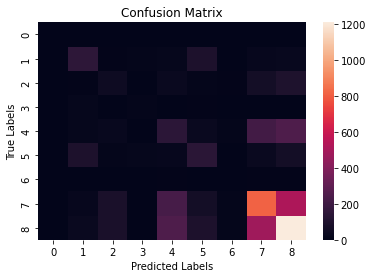

In [143]:
from sklearn.metrics import classification_report, confusion_matrix
crime_cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots()
sns.heatmap(crime_cm, annot=False, ax = ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

In [144]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.43      0.44      0.44       322
           2       0.17      0.17      0.17       257
           3       0.31      0.34      0.33        38
           4       0.20      0.20      0.20       682
           5       0.31      0.36      0.33       374
           6       0.02      0.03      0.03        31
           7       0.50      0.47      0.48      1738
           8       0.56      0.56      0.56      2157

    accuracy                           0.45      5601
   macro avg       0.28      0.29      0.28      5601
weighted avg       0.45      0.45      0.45      5601



## Random Forest

In [145]:
target = ["OFFENSES"]
#dc_crime_df = pd.get_dummies(dc_crime_df, columns=['SHIFT', 'METHOD', 'NEIGHBORHOOD_CLUSTER', 'VOTING_PRECINCT'])

#X = dc_crime_df.drop(columns = 'OFFENSES')
#X = pd.get_dummies(X)

#.drop('loan_status', axis=1)

# Create our target
# YOUR CODE HERE
#y = df['loan_status']
#y = dc_crime_df.loc[:, target].copy()
dc_crime_df.head()

,year,month,day,dayofweek,quarter,CCN,OFFENSE,XBLOCK,YBLOCK,PSA,...,NEIGHBORHOOD_CLUSTER_Cluster 45,NEIGHBORHOOD_CLUSTER_Cluster 46,NEIGHBORHOOD_CLUSTER_Cluster 5,NEIGHBORHOOD_CLUSTER_Cluster 6,NEIGHBORHOOD_CLUSTER_Cluster 7,NEIGHBORHOOD_CLUSTER_Cluster 8,NEIGHBORHOOD_CLUSTER_Cluster 9,SHIFT_DAY,SHIFT_EVENING,SHIFT_MIDNIGHT
0,2021,12,6,0,4,20139232,3,398576.16,141939.53,407.0,...,0,0,0,0,0,0,0,0,0,1
1,2021,10,13,2,4,11048862,7,394049.03,140468.17,204.0,...,0,0,0,0,0,0,0,0,1,0
2,2021,8,4,2,3,10008883,8,406401.56,135172.74,604.0,...,0,0,0,0,0,0,0,0,1,0
3,2021,9,1,2,3,11124202,8,400924.55,137563.02,506.0,...,0,0,0,0,0,0,0,1,0,0
4,2021,8,12,3,3,12113231,8,401249.74,138295.18,506.0,...,0,0,0,0,0,0,0,1,0,0


In [146]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [147]:
# Balanced Random Forest Calculator
from imblearn.ensemble import BalancedRandomForestClassifier
crime_brf = BalancedRandomForestClassifier(n_estimators=1500, random_state=0)

crime_brf.fit(X_train, y_train)
y_pred = crime_brf.predict(X_test)

In [148]:
#Calculate the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.3985785400177859

In [149]:
#Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred=crime_brf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[   1,    0,    0,    0,    0,    0,    0,    0,    0],
       [  67,  408,   25,  210,   22,   47,   21,   13,   17],
       [ 181,    3,  144,   11,   71,    1,   46,  127,   64],
       [   1,    3,    3,   90,    0,    0,    0,    0,    0],
       [ 443,    1,  206,   20,  313,    1,  162,  238,  240],
       [ 119,  255,   64,  227,   71,   96,   45,   50,   59],
       [  30,    7,    6,    1,   10,    2,   11,    8,   11],
       [1018,    0,  480,   19,  566,    0,  269, 1058,  835],
       [1401,   13,  573,   23,  666,    0,  343,  940, 1527]],
      dtype=int64)

In [150]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      1.00      0.77      0.00      0.88      0.79         1
          1       0.59      0.49      0.98      0.54      0.69      0.46       830
          2       0.10      0.22      0.90      0.13      0.45      0.19       648
          3       0.15      0.93      0.96      0.26      0.95      0.89        97
          4       0.18      0.19      0.89      0.19      0.41      0.16      1624
          5       0.65      0.10      1.00      0.17      0.31      0.09       986
          6       0.01      0.13      0.94      0.02      0.35      0.11        86
          7       0.43      0.25      0.86      0.32      0.46      0.20      4245
          8       0.55      0.28      0.86      0.37      0.49      0.22      5486

avg / total       0.46      0.26      0.88      0.31      0.47      0.22     14003



In [151]:
# List the features sorted in descending order by feature importance
# YOUR CODE HERE
importances = crime_brf.feature_importances_
sorted(zip(crime_brf.feature_importances_, dc_crime_df.columns), reverse=True)

[(0.07375996898591856, 'XBLOCK'),
 (0.07264615987968658, 'CCN'),
 (0.07064883883294125, 'OFFENSE'),
 (0.06533695479475429, 'day'),
 (0.06146618549947227, 'YBLOCK'),
 (0.05268568168121485, 'month'),
 (0.052386663961004186, 'dayofweek'),
 (0.04048785650341918, 'METHOD_KNIFE'),
 (0.03572719048440912, 'quarter'),
 (0.034318682339544014, 'PSA'),
 (0.02861182009467268, 'SHIFT_EVENING'),
 (0.022172257021101042, 'SHIFT_DAY'),
 (0.02120079033551587, 'year'),
 (0.019972380169553848, 'NEIGHBORHOOD_CLUSTER_Cluster 9'),
 (0.010011952407373197, 'METHOD_GUN'),
 (0.008167127738947165, 'NEIGHBORHOOD_CLUSTER_Cluster 22'),
 (0.007968496461914642, 'NEIGHBORHOOD_CLUSTER_Cluster 7'),
 (0.007871894733698998, 'NEIGHBORHOOD_CLUSTER_Cluster 24'),
 (0.007668148013401679, 'NEIGHBORHOOD_CLUSTER_Cluster 19'),
 (0.006634805492928561, 'VOTING_PRECINCT_Precinct 76'),
 (0.006215715856086341, 'NEIGHBORHOOD_CLUSTER_Cluster 38'),
 (0.006070551762710939, 'NEIGHBORHOOD_CLUSTER_Cluster 5'),
 (0.005961355325949411, 'NEIGHBORH

([<matplotlib.axis.YTick at 0x222e2ac4588>,
 [Text(0, 0, 'month'),
  Text(0, 1, 'day'),
  Text(0, 2, 'dayofweek'),
  Text(0, 3, 'quarter'),
  Text(0, 4, 'CCN'),
  Text(0, 5, 'OFFENSE'),
  Text(0, 6, 'XBLOCK'),
  Text(0, 7, 'YBLOCK'),
  Text(0, 8, 'PSA'),
  Text(0, 9, 'METHOD_GUN'),
  Text(0, 10, 'METHOD_KNIFE'),
  Text(0, 11, 'METHOD_OTHERS'),
  Text(0, 12, 'VOTING_PRECINCT_Precinct 1'),
  Text(0, 13, 'VOTING_PRECINCT_Precinct 10'),
  Text(0, 14, 'VOTING_PRECINCT_Precinct 100'),
  Text(0, 15, 'VOTING_PRECINCT_Precinct 101'),
  Text(0, 16, 'VOTING_PRECINCT_Precinct 102'),
  Text(0, 17, 'VOTING_PRECINCT_Precinct 103'),
  Text(0, 18, 'VOTING_PRECINCT_Precinct 104'),
  Text(0, 19, 'VOTING_PRECINCT_Precinct 105'),
  Text(0, 20, 'VOTING_PRECINCT_Precinct 106'),
  Text(0, 21, 'VOTING_PRECINCT_Precinct 107'),
  Text(0, 22, 'VOTING_PRECINCT_Precinct 108'),
  Text(0, 23, 'VOTING_PRECINCT_Precinct 109'),
  Text(0, 24, 'VOTING_PRECINCT_Precinct 11'),
  Text(0, 25, 'VOTING_PRECINCT_Precinct 110'),


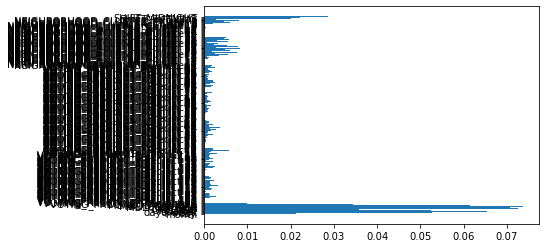

In [152]:
n_features = X.shape[1]
plt.barh(range(n_features),crime_brf.feature_importances_)
plt.yticks(np.arange(n_features),dc_crime_df.columns[1:])